In [ ]:
pip install opencv-python ipyplot

In [ ]:
import cv2 #used to load the images (in the future it will have other uses)
import numpy as np
import glob #used to read image names
import random #used to generate tran/test split
import ipyplot #it will be explained
from matplotlib import pyplot as plt #for all ur plotting needs

import pickle

In [ ]:
#load my data
train_images_resized = pickle.load( open( "/content/drive/My Drive/fac/Laborator/Images/dump_train_images_resized", "rb" ) )
test_images_resized = pickle.load( open( "/content/drive/My Drive/fac/Laborator/Images/dump_test_images_resized", "rb" ) )
train_images_resized_gray = pickle.load( open( "/content/drive/My Drive/fac/Laborator/Images/dump_train_images_resized_gray", "rb" ) )
test_images_resized_gray = pickle.load( open( "/content/drive/My Drive/fac/Laborator/Images/dump_test_images_resized_gray", "rb" ) )

(4, 7, 2000)



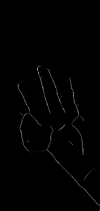
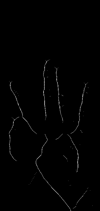
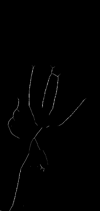
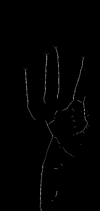
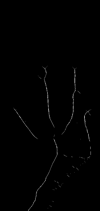
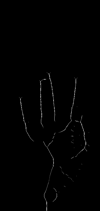
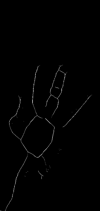
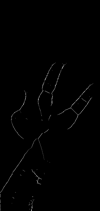
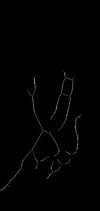
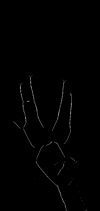
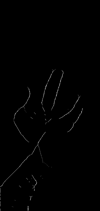
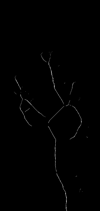
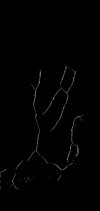
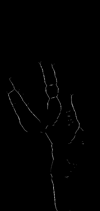
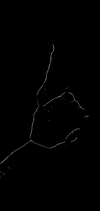
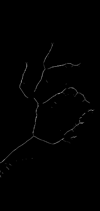
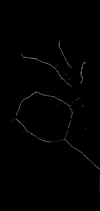
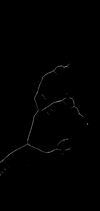
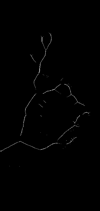
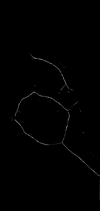
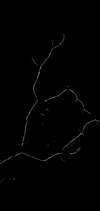
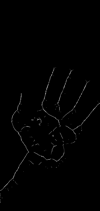
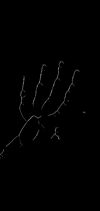
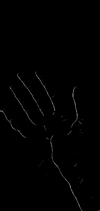
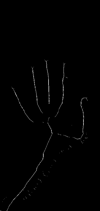
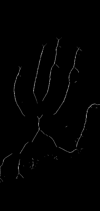
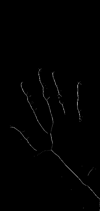


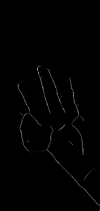
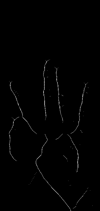
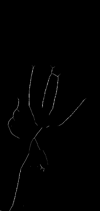
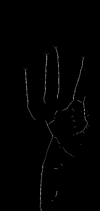
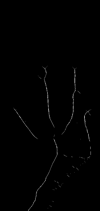
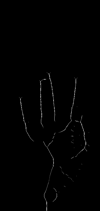
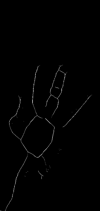
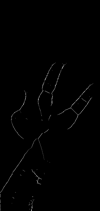
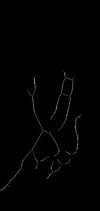
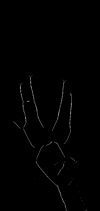
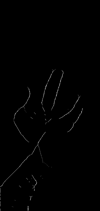
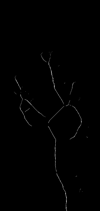
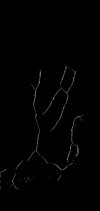
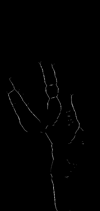
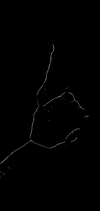
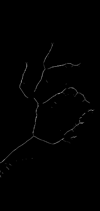
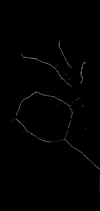
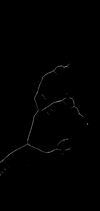
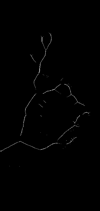
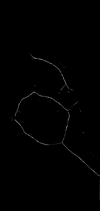
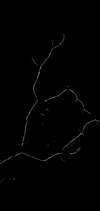
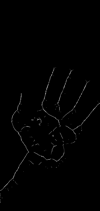
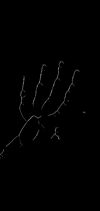
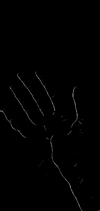
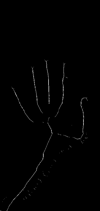
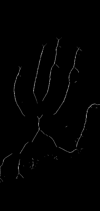
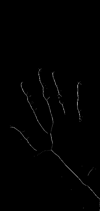

In [ ]:
all_sk = []
all_dt_sk = []
for im_set in train_images_resized:
  sk = []
  dt_sk = []
  for im in im_set:
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(im,-1,kernel)
    (b, g, r) = cv2.split(im)
    r = cv2.filter2D(r,-1,kernel)
    ret_r, thresh_r = cv2.threshold(r, 110, 255, cv2.THRESH_BINARY)

    img = thresh_r
    kernel = np.ones((10,10),np.uint8)
    img = cv2.erode(img,kernel,iterations = 1)

    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)

    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False

    while( not done):
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True
    x,y = np.nonzero(skel)
    t = np.array(list(zip(x, y))).flatten()
    dt_sk.append(t[0:2000])
    sk.append(skel)
  all_sk.append(sk)
  all_dt_sk.append(dt_sk)


print(np.shape(all_dt_sk))
flat_list = [item for sublist in all_sk for item in sublist]
ipyplot.plot_images(flat_list, max_images=27, img_width=100)


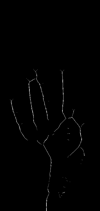
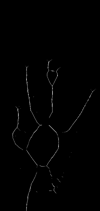
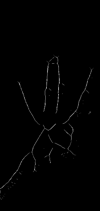
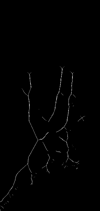
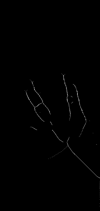
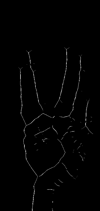
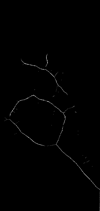
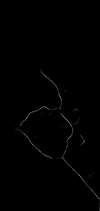
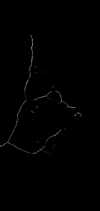
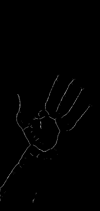
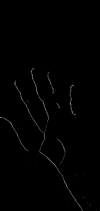
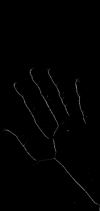


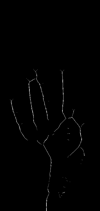
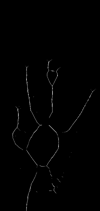
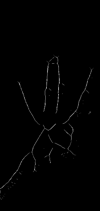
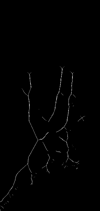
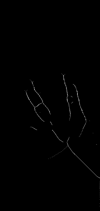
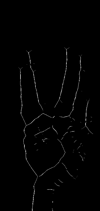
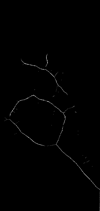
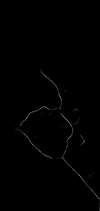
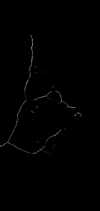
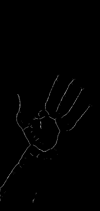
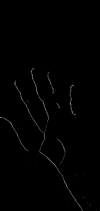
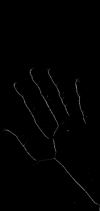

In [ ]:
all_sk_test = []
all_dt_sk_test = []
for im_set in test_images_resized:
  sk = []
  dt_sk = []
  for im in im_set:
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(im,-1,kernel)
    (b, g, r) = cv2.split(im)
    r = cv2.filter2D(r,-1,kernel)
    ret_r, thresh_r = cv2.threshold(r, 110, 255, cv2.THRESH_BINARY)

    img = thresh_r
    kernel = np.ones((10,10),np.uint8)
    img = cv2.erode(img,kernel,iterations = 1)

    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)

    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False

    while( not done):
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True
    x,y = np.nonzero(skel)
    t = np.array(list(zip(x, y))).flatten()
    dt_sk.append(t[0:2000])
    sk.append(skel)
  all_sk_test.append(sk)
  all_dt_sk_test.append(dt_sk)



flat_list = [item for sublist in all_sk_test for item in sublist]
ipyplot.plot_images(flat_list, max_images=27, img_width=100)

In [ ]:
print(np.shape(all_dt_sk))

(4, 7, 2000)


In [ ]:
all_dt_sk = np.reshape(all_dt_sk,(4*7,2000))
y = np.zeros(4*7)
y[7:] = 1
y[14:] = 2
y[21:] = 3

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn.fit(all_dt_sk[:,0:10000], y)
for i in range(4):
  for j in range(3):
    print(knn.predict(all_dt_sk_test[i][j].reshape(1, -1)[:,0:10000]))


[0.]
[0.]
[0.]
[0.]
[1.]
[3.]
[1.]
[2.]
[2.]
[1.]
[0.]
[0.]


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(all_dt_sk, y)
for i in range(4):
  for j in range(3):
    print(clf.predict(all_dt_sk_test[i][j].reshape(1, -1)))

[1.]
[0.]
[0.]
[1.]
[1.]
[3.]
[2.]
[2.]
[2.]
[1.]
[0.]
[0.]
